In [1]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import packages 
import re
import shutil
import os


# 1 Import total number of genes 

In [2]:
total = pd.read_csv("12_gene_length_distribution/total_number_of_genes.csv")
total = total.rename(columns={"x": "gene_name"})

In [3]:
len(total["gene_name"])

79060

In [4]:
len(total["gene_name"].unique())

79060

# 2 Import list of gene names 
with more that 10 reads in total (over all three conditions)

In [5]:
genenames = pd.read_csv("12_gene_length_distribution/number_of_genes_with_total_of_10_reads.csv")
genenames = genenames.rename(columns={"x": "gene_name"})

# 2 Import annotation   

In [6]:
# import ccar_annotation.gtf as pd df 
import pandas as pd 

annotation = pd.read_csv('12_gene_length_distribution/ccar_annotation.gtf', sep='\t', skiprows=1, header=None)
# renaming the header of the annotation file
annotation = annotation.rename({0: 'seqname',
                                1: 'source',
                                2: 'feature',
                                3: 'start',
                                4: 'stop',
                                5: 'score',
                                6: 'strand',
                                7: 'frame',
                                8: 'attribute'}, axis=1)

    
# define a function to extract the geneid
def extract_gene_id(attributes):
    # Using a regular expression to match and extract the desired part
    match = re.search(r'gene_id "([^"]+)"', attributes)
    if match:
        return match.group(1)
    else:
        return 0 # Return 0 if there is no match
    
# filtering the column feature for transcritps
annotation = annotation[annotation['feature'] == 'transcript']
# Apply the function to the "attributes" column and create a new column with the extracted gene ids
annotation['gene_id'] = annotation['attribute'].apply(extract_gene_id)

In [7]:
annotation

,seqname,source,feature,start,stop,score,strand,frame,attribute,gene_id
1,scaffold_1,AUGUSTUS,transcript,853,1182,.,-,.,"gene_id ""scaffold_1-ccar_g78106""; transcript_i...",scaffold_1-ccar_g78106
5,scaffold_1,AUGUSTUS,transcript,1206,3636,.,-,.,"gene_id ""scaffold_1-ccar_g78107""; transcript_i...",scaffold_1-ccar_g78107
14,scaffold_1,AUGUSTUS,transcript,1206,4480,.,-,.,"gene_id ""scaffold_1-ccar_g78107""; transcript_i...",scaffold_1-ccar_g78107
26,scaffold_1,AUGUSTUS,transcript,25201,29395,.,-,.,"gene_id ""scaffold_1-ccar_g78108""; transcript_i...",scaffold_1-ccar_g78108
44,scaffold_1,.,transcript,37193,53864,.,-,.,"gene_id ""scaffold_1-ccar_g78111""; transcript_i...",scaffold_1-ccar_g78111
...,...,...,...,...,...,...,...,...,...,...
2683163,scaffold_186,AUGUSTUS,transcript,2678,6048,.,-,.,"gene_id ""scaffold_186-ccar_g78522""; transcript...",scaffold_186-ccar_g78522
2683169,scaffold_186,AUGUSTUS,transcript,4344,4646,.,-,.,"gene_id ""scaffold_186-ccar_g78523""; transcript...",scaffold_186-ccar_g78523
2683173,scaffold_190,AUGUSTUS,transcript,3576,3893,.,+,.,"gene_id ""scaffold_190-ccar_g78560""; transcript...",scaffold_190-ccar_g78560
2683177,scaffold_200,AUGUSTUS,transcript,396,1504,.,+,.,"gene_id ""scaffold_200-ccar_g78621""; transcript...",scaffold_200-ccar_g78621


In [8]:
# keep only the lines of the annotation df that contain the gene_id from the gene names list 
data = pd.merge(annotation, genenames, left_on='gene_id', right_on='gene_name')


In [9]:
data

,seqname,source,feature,start,stop,score,strand,frame,attribute,gene_id,gene_name
0,scaffold_1,.,transcript,37193,53864,.,-,.,"gene_id ""scaffold_1-ccar_g78111""; transcript_i...",scaffold_1-ccar_g78111,scaffold_1-ccar_g78111
1,scaffold_1,AUGUSTUS,transcript,39808,42816,.,-,.,"gene_id ""scaffold_1-ccar_g78109""; transcript_i...",scaffold_1-ccar_g78109,scaffold_1-ccar_g78109
2,scaffold_1,AUGUSTUS,transcript,39808,43252,.,-,.,"gene_id ""scaffold_1-ccar_g78109""; transcript_i...",scaffold_1-ccar_g78109,scaffold_1-ccar_g78109
3,scaffold_1,AUGUSTUS,transcript,43471,49992,.,+,.,"gene_id ""scaffold_1-ccar_g78110""; transcript_i...",scaffold_1-ccar_g78110,scaffold_1-ccar_g78110
4,scaffold_1,AUGUSTUS,transcript,86446,91387,.,+,.,"gene_id ""scaffold_1-ccar_g78116""; transcript_i...",scaffold_1-ccar_g78116,scaffold_1-ccar_g78116
...,...,...,...,...,...,...,...,...,...,...,...
98620,scaffold_153,AUGUSTUS,transcript,6178,6550,.,-,.,"gene_id ""scaffold_153-ccar_g78453""; transcript...",scaffold_153-ccar_g78453,scaffold_153-ccar_g78453
98621,scaffold_168,AUGUSTUS,transcript,1045,1609,.,+,.,"gene_id ""scaffold_168-ccar_g78493""; transcript...",scaffold_168-ccar_g78493,scaffold_168-ccar_g78493
98622,scaffold_186,AUGUSTUS,transcript,2678,6048,.,-,.,"gene_id ""scaffold_186-ccar_g78522""; transcript...",scaffold_186-ccar_g78522,scaffold_186-ccar_g78522
98623,scaffold_186,AUGUSTUS,transcript,4344,4646,.,-,.,"gene_id ""scaffold_186-ccar_g78523""; transcript...",scaffold_186-ccar_g78523,scaffold_186-ccar_g78523


In [10]:
# which genes are not unique 
data['gene_name'].value_counts()

gene_name
ccar_ua21-ccar_g34104       51
ccar_ub21-ccar_g72802       48
ccar_ub20-ccar_g70882       33
ccar_ua09-ccar_g16165       26
ccar_ua04-ccar_g7631        25
                            ..
ccar_ua10-ccar_g18137        1
ccar_ua10-ccar_g18136        1
ccar_ua10-ccar_g18134        1
ccar_ua10-ccar_g18133        1
scaffold_200-ccar_g78621     1
Name: count, Length: 50981, dtype: int64

In [11]:
# calculate max length of gene length
data['length'] = data['stop'] - data['start']
maxima = data['length'].max()
minima = data['length'].min()
# calculate the average
mean_genelength = data['length'].mean()

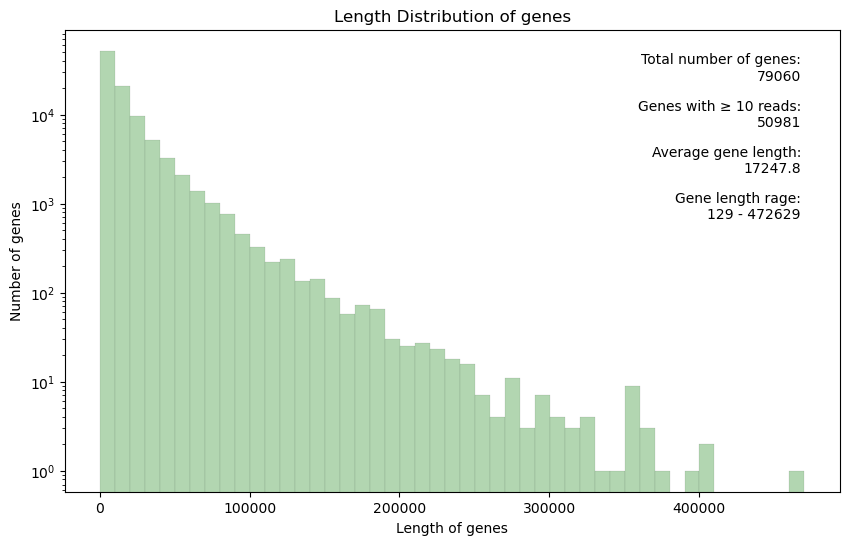

In [16]:
# PLOT: Length Distribution of Genes 
plt.figure(figsize=(10, 6))
plt.title('Length Distribution of genes')
# on the x axis: Length of genes
plt.xlabel('Length of genes')
# on the y axis: Number of genes
plt.ylabel('Number of genes')

# plot the histogram
plt.hist(data['stop'] - data['start'], bins=range(minima,maxima, 10000), color='#B2D6B1', edgecolor='black', linewidth=0.05)
plt.yscale('log')



# LABELS: 
# add label for total number of genes 
plt.text(0.95, 0.95, f'Total number of genes:\n{len(total["gene_name"])}', ha='right', va='top', transform=plt.gca().transAxes)
# add total number of unique genes 
plt.text(0.95, 0.85, f"Genes with ≥ 10 reads:\n{len(data['gene_name'].unique())}", ha='right', va='top', transform=plt.gca().transAxes)
# add numer label for average at the top right corner 
plt.text(0.95, 0.75, f'Average gene length:\n{mean_genelength:.1f}', ha='right', va='top', transform=plt.gca().transAxes)

plt.text(0.95, 0.65, f'Gene length rage:\n{minima} - {maxima}', ha='right', va='top', transform=plt.gca().transAxes)


# save the plot as png with 500 dpi
plt.savefig('12_gene_length_distribution/gene_length_distribution.png', dpi=500)
